coefficient:  [[1.83388077]]
MSE:  0.9525982491537194
R2:  -2.1913266816095334
y1 =  1.8338807679948192 * x -7.171161681699658


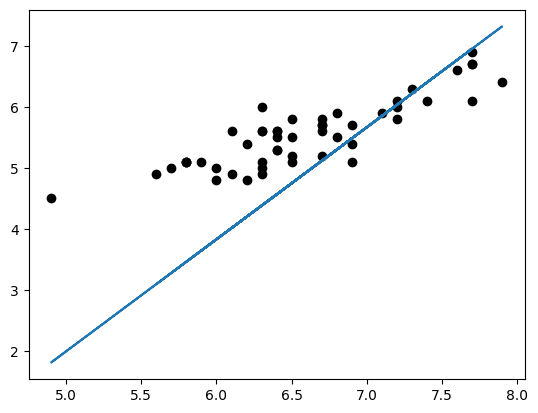

R2:  0.7208563619774184
y2 =  1.8274677004325224 * x -6.931199634960259


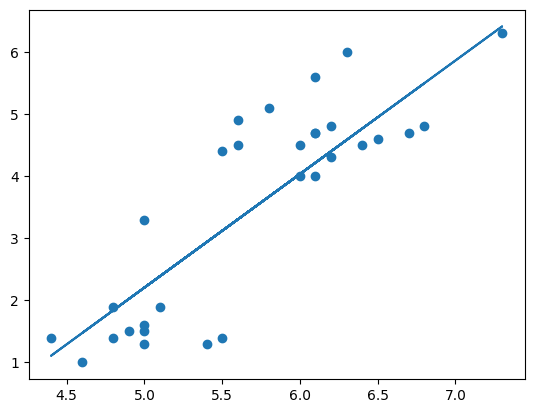

In [311]:
import os
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

file_path = os.path.join(os.getcwd(), 'iris.data')
df = pd.read_csv(file_path, header=None, encoding='utf-8')
df.tail()
X_train = df.iloc[0:100, [0]]
X_test = df.iloc[100: 150, [0]]
y_train = df.iloc[0:100, [2]]
y_test = df.iloc[100:150, [2]]

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('coefficient: ', reg.coef_)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
R2 = r2_score(y_test, y_pred)
print('R2: ', R2)

print('y1 = ', reg.coef_[0][0], '* x', reg.intercept_[0])

plt.scatter(X_test, y_test, c="black")
plt.plot(X_test, y_pred)
plt.show()

X = df.iloc[0:150, [0]]
y = df.iloc[0:150, [2]]

X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=0, test_size=.2)
reg = Ridge(alpha=.5, solver='auto')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R2: ', r2_score(y_test, y_pred))

print('y2 = ', reg.coef_[0][0], '* x', reg.intercept_[0])

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

plt.show()


Text(0, 0.5, 'NNLS regression coefficients')

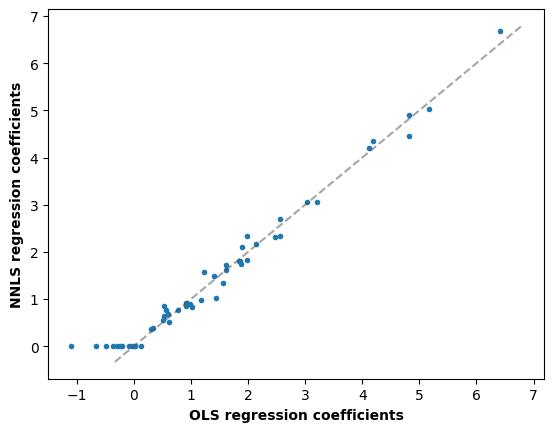

In [257]:
from numpy.random import randn, normal, seed
from numpy import dot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
seed(42)

n_samples, n_features = 200, 50
X = randn(n_samples, n_features)
true_coef = 3 * randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = dot(X, true_coef)

# Add some noise
y += 5 * normal(size=(n_samples,))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.5)
reg = LinearRegression(positive=True)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

reg_ols =  LinearRegression()
reg_ols.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")



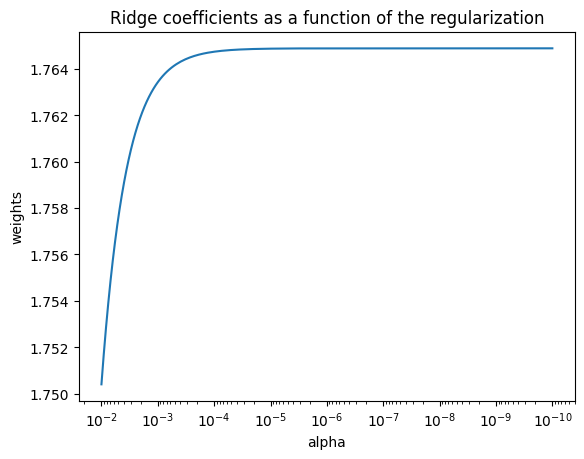

In [312]:
from matplotlib import pyplot as plt
import  numpy as np
from sklearn.linear_model import Ridge

X = 1.0 / (np.arange(1, 11) + np.arange(0, 10))[:, np.newaxis]
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()